In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

MC Run

In [2]:
from plotting.plot_funcs import plot_cluster

# logger! 

#plot_cluster(exp.df, "cluster", title="True Clusters")

In [3]:
import pickle
run_results = pickle.load( open( "saved_runs/exp_50_cl_4_6_221027_1.pickle", "rb" ) )

run_data = pickle.load( open( "saved_runs/run_data_exp_50_cl_4_6_221027_1.pickle", "rb" ) )

In [4]:
from mc_simulation.after_processing import process_run_results2

df_total = process_run_results2(run_results, run_data)
df_total = df_total[df_total.dataset!=65]

OPTICS


66it [00:59,  1.12it/s]


random_inside


65it [01:25,  1.31s/it]


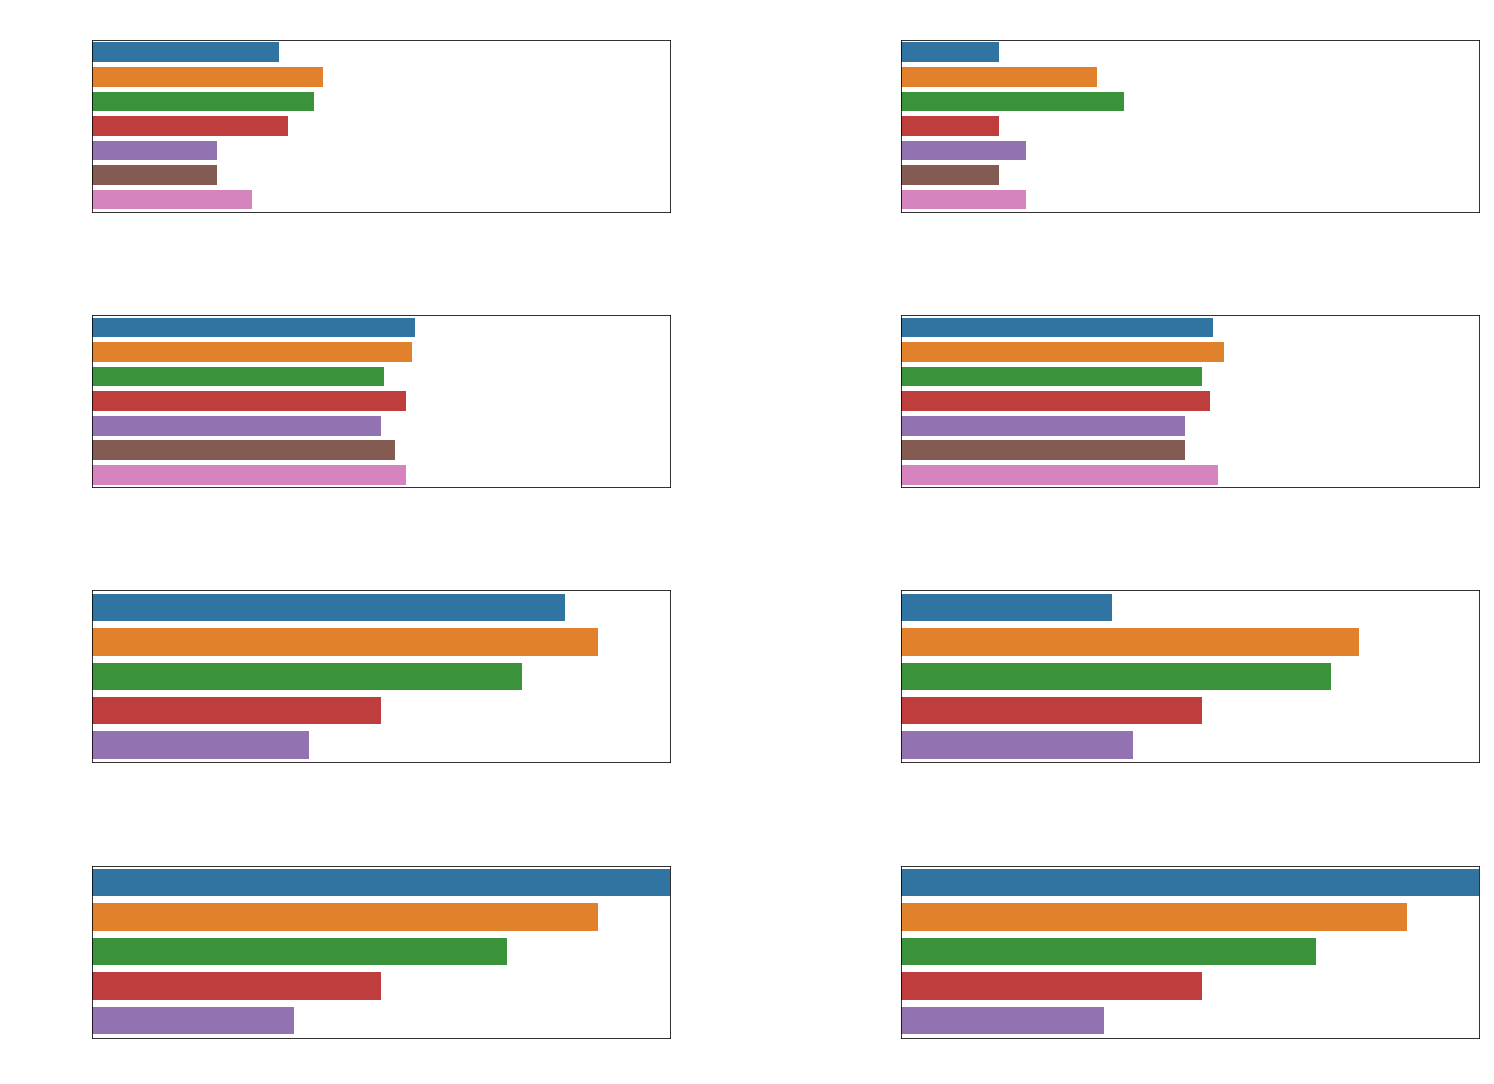

In [24]:
import seaborn as sns
from plotting.mc_simulation.criteria_performance import add_score_performance_plot, add_score_performance_plot_identified
from plotting.mc_simulation.init_performance import add_init_rout_performance_plot#, add_init_rout_performance_plot_identified
from plotting.mc_simulation.clusternumber import add_True_Cluster_number_performance_plot_identified
settings = {
    "ax_title_size": 18,
    "axis_label_size": 18
}

fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20, 15)
fig.suptitle("Analysis of MC-Run", color="white", size=30)
fig.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.4)
add_score_performance_plot(df_total, axs[0,0], settings, "OPTICS")
add_score_performance_plot(df_total, axs[0,1], settings, "random_inside")
add_score_performance_plot_identified(df_total, axs[1,0], settings, "OPTICS")
add_score_performance_plot_identified(df_total, axs[1,1], settings, "random_inside")
total_rank = "ll_rank"
#add_init_rout_performance_plot(df_total,axs[0,1], settings, total_rank=total_rank)
#add_init_rout_performance_plot_identified(df_total,axs[1,1], settings, total_rank=total_rank)
add_True_Cluster_number_performance_plot_identified(df_total, axs[2,0], settings,total_rank = total_rank, init_routine="OPTICS")
add_True_Cluster_number_performance_plot_identified(df_total, axs[2,1], settings,total_rank = total_rank, init_routine="random_inside")
total_rank = "AIC_rank"
add_True_Cluster_number_performance_plot_identified(df_total, axs[3,0], settings,total_rank = total_rank, init_routine="OPTICS")
add_True_Cluster_number_performance_plot_identified(df_total, axs[3,1], settings,total_rank = total_rank, init_routine="random_inside")

In [6]:
cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank', 'silhouette_rank', 'identified_cluster', "N_cluster",'True_Cluster_number']

In [25]:
dataset = 30
init_routine = "OPTICS"
param_idx = 32
criterion = "AIC"
df_select = df_total.loc[(df_total.dataset == dataset) & (df_total.init_routine == init_routine),cols].sort_values("AIC_rank")
df_select.head(25)

,param_index,ll,AIC,BIC,silhouette,ll_rank,AIC_rank,BIC_rank,silhouette_rank,identified_cluster,N_cluster,True_Cluster_number
5,32,-319.895731,339.895731,370.521681,0.418869,3,1,11,6,3.0,5,5
6,29,-319.905405,339.905405,370.531355,0.418869,4,2,12,6,3.0,5,5
14,30,-320.491552,340.491552,371.117502,0.365739,5,3,20,9,5.0,5,5
13,36,-318.314600,342.314600,379.065740,0.394112,1,4,22,8,3.0,6,5
12,35,-318.644509,342.644509,379.395649,0.408978,2,5,23,7,3.0,6,5
0,26,-328.019543,344.019543,368.520303,0.483068,6,6,6,2,4.0,4,5
1,27,-328.039374,344.039374,368.540134,0.483068,7,7,7,2,4.0,4,5
2,23,-328.039423,344.039423,368.540183,0.483068,8,8,8,2,4.0,4,5
3,25,-328.039423,344.039423,368.540183,0.483068,9,9,9,2,4.0,4,5
4,24,-328.039441,344.039441,368.540201,0.483068,10,10,10,2,4.0,4,5


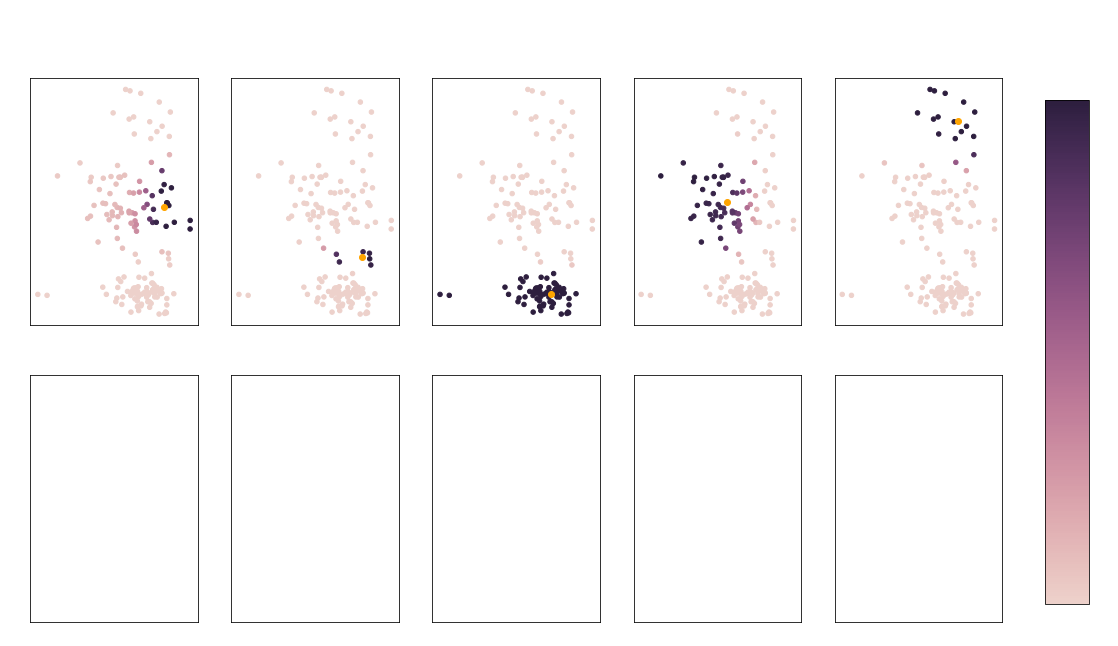

In [26]:
from plotting.plot_funcs import plot_responsibilities
plot_responsibilities(run_data[dataset], run_results[init_routine]["em_results"][dataset][param_idx]) 

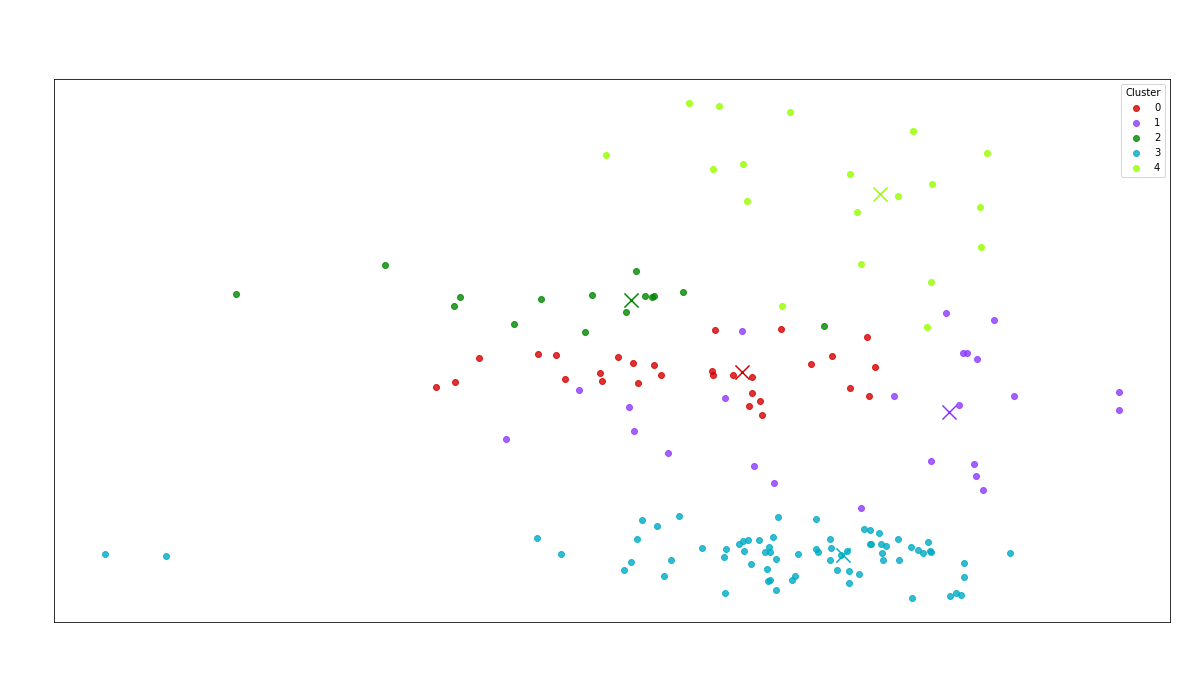

In [9]:
plot_cluster(run_data[dataset].df, "cluster", title="True Clusters")

In [10]:
from post_processing.identfy_clusters import get_prediction_df

df_pred = get_prediction_df(run_data[dataset].df, {"params":run_results[init_routine]["em_results"][dataset]} , run_results[init_routine]["df_scores"][dataset].sort_values(criterion))

In [11]:
df_pred[df_pred.cluster == 1]

,cluster,x_mean_og,y_mean_og,y_std_og,prediction_cluster,x_mean,y_mean,y_std,center_distance,x,y,gamma_0,gamma_1,gamma_2,gamma_3,gamma_4,identified_as_cluster
29,1,1.084241,3.06301,0.902254,0,1.284129,3.906984,0.578427,0.860768,0.681235,3.328540,0.954958,1.392846e-10,1.424702e-13,4.503091e-02,1.110680e-05,noise
30,1,1.084241,3.06301,0.902254,0,1.284129,3.906984,0.578427,0.860768,1.868941,3.329404,0.999993,1.171913e-10,3.123837e-14,2.557300e-06,4.724162e-06,noise
31,1,1.084241,3.06301,0.902254,0,1.284129,3.906984,0.578427,0.860768,1.586856,4.555397,0.995788,6.638991e-40,2.953646e-30,4.004697e-05,4.171782e-03,noise
32,1,1.084241,3.06301,0.902254,0,1.284129,3.906984,0.578427,0.860768,1.263683,4.016423,0.999316,7.987750e-25,2.199965e-22,4.230881e-04,2.609008e-04,noise
33,1,1.084241,3.06301,0.902254,0,1.284129,3.906984,0.578427,0.860768,1.056261,4.671595,0.984313,1.433443e-43,9.741286e-32,3.506606e-03,1.218030e-02,noise
34,1,1.084241,3.06301,0.902254,0,1.284129,3.906984,0.578427,0.860768,4.531880,3.396180,0.999999,5.652864e-12,1.709497e-16,6.944488e-16,8.637152e-07,noise
35,1,1.084241,3.06301,0.902254,0,1.284129,3.906984,0.578427,0.860768,4.514145,3.090417,0.999999,3.323016e-07,4.121219e-13,8.436981e-16,1.980096e-07,noise
36,1,1.084241,3.06301,0.902254,0,1.284129,3.906984,0.578427,0.860768,1.224385,4.025038,0.999131,4.913398e-25,1.772868e-22,5.874780e-04,2.816245e-04,noise
37,1,1.084241,3.06301,0.902254,0,1.284129,3.906984,0.578427,0.860768,1.179494,3.185844,0.999215,2.390031e-08,2.968430e-12,7.812292e-04,3.966930e-06,noise
38,1,1.084241,3.06301,0.902254,0,1.284129,3.906984,0.578427,0.860768,1.377193,3.926576,0.999692,1.176129e-22,2.968874e-21,1.601975e-04,1.475933e-04,noise


In [12]:
run_results[init_routine]["em_results"][dataset]

[array([1.        , 0.47940976, 2.73749949, 2.12131795]),
 array([1.        , 0.4793972 , 2.73753468, 2.12119773]),
 array([1.        , 0.47940137, 2.73759296, 2.12132216]),
 array([1.        , 0.47940393, 2.73757247, 2.12127162]),
 array([1.        , 0.47940498, 2.73758027, 2.12126605]),
 array([1.        , 0.47941488, 2.73762157, 2.12127494]),
 array([1.        , 0.47940369, 2.73756684, 2.12127336]),
 array([0.56929404, 0.50524996, 4.24337244, 1.60234389, 0.43070596,
        0.44524338, 0.74721319, 0.30853618]),
 array([0.20081333, 0.10765289, 4.36851203, 1.82253367, 0.79918667,
        0.57277626, 2.32763918, 1.98975416]),
 array([0.5692902 , 0.50525011, 4.24343809, 1.60231693, 0.4307098 ,
        0.44524365, 0.7472142 , 0.30853751]),
 array([0.43070972, 0.44524366, 0.74721418, 0.3085375 , 0.56929028,
        0.5052501 , 4.24343638, 1.60231758]),
 array([0.56929398, 0.50524995, 4.24337377, 1.60234333, 0.43070602,
        0.44524336, 0.74721319, 0.30853626]),
 array([0.20023318, 0.10

In [13]:
run_data[dataset].df

,x,y,cluster
0,0.406999,3.966498,0
1,0.177458,3.667022,0
2,0.014657,3.466077,0
3,0.264858,4.403201,0
4,0.096984,3.670256,0
...,...,...,...
14,0.122689,8.058094,4
15,0.198989,6.472322,4
16,0.933629,5.166431,4
17,0.267635,4.786988,4


In [14]:
run_results["random_inside"].keys(
)

dict_keys(['init_params', 'df_scores', 'df_scores_na', 'em_results'])

In [15]:
pd.options.display.max_columns = None
run_results[init_routine]["df_scores"][dataset].sort_values("AIC_rank").head(30)

,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank,init_routine,dataset,True_Cluster_number,identified_cluster
5,32,205,4.633503,-319.895731,339.895731,370.521681,345.314118,0.418869,292.701250,5,3,1,11,2,6,5,28,1,0.956726,6,OPTICS,30,5,3.0
6,29,272,3.111147,-319.905405,339.905405,370.531355,345.322550,0.418869,292.701250,5,4,2,12,3,6,5,32,2,0.956682,7,OPTICS,30,5,3.0
14,30,260,3.232818,-320.491552,340.491552,371.117502,346.949510,0.365739,257.114699,5,5,3,20,5,9,11,53,12,0.930843,15,OPTICS,30,5,5.0
13,36,88,4.814768,-318.314600,342.314600,379.065740,344.265860,0.394112,247.771238,6,1,4,22,1,8,12,48,8,0.939035,14,OPTICS,30,5,3.0
12,35,60,3.705973,-318.644509,342.644509,379.395649,346.337567,0.408978,268.141880,6,2,5,23,4,7,10,51,10,0.941476,13,OPTICS,30,5,3.0
0,26,58,1.568524,-328.019543,344.019543,368.520303,351.448434,0.483068,311.351246,4,6,6,6,11,2,2,33,3,0.961741,1,OPTICS,30,5,4.0
1,27,291,2.899185,-328.039374,344.039374,368.540134,351.468184,0.483068,311.351246,4,7,7,7,12,2,2,37,4,0.961648,2,OPTICS,30,5,4.0
2,23,256,1.662448,-328.039423,344.039423,368.540183,351.468233,0.483068,311.351246,4,8,8,8,13,2,2,41,6,0.961648,3,OPTICS,30,5,4.0
3,25,292,2.875296,-328.039423,344.039423,368.540183,351.468234,0.483068,311.351246,4,9,9,9,14,2,1,44,7,0.961648,4,OPTICS,30,5,4.0
4,24,292,2.720769,-328.039441,344.039441,368.540201,351.468251,0.483068,311.351246,4,10,10,10,15,2,3,50,9,0.961648,5,OPTICS,30,5,4.0


In [16]:
run_results["OPTICS"]["df_scores"][30]

,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank,init_routine,dataset,True_Cluster_number,identified_cluster
0,26,58,1.568524,-328.019543,344.019543,368.520303,351.448434,0.483068,311.351246,4,6,6,6,11,2,2,33,3,0.961741,1,OPTICS,30,5,4.0
1,27,291,2.899185,-328.039374,344.039374,368.540134,351.468184,0.483068,311.351246,4,7,7,7,12,2,2,37,4,0.961648,2,OPTICS,30,5,4.0
2,23,256,1.662448,-328.039423,344.039423,368.540183,351.468233,0.483068,311.351246,4,8,8,8,13,2,2,41,6,0.961648,3,OPTICS,30,5,4.0
3,25,292,2.875296,-328.039423,344.039423,368.540183,351.468234,0.483068,311.351246,4,9,9,9,14,2,1,44,7,0.961648,4,OPTICS,30,5,4.0
4,24,292,2.720769,-328.039441,344.039441,368.540201,351.468251,0.483068,311.351246,4,10,10,10,15,2,3,50,9,0.961648,5,OPTICS,30,5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,61,22,1.544672,-454.420032,490.420032,545.546743,493.484583,0.130117,182.391122,9,60,60,60,61,31,28,300,53,0.134148,60,OPTICS,30,5,4.0
60,59,16,1.636169,-454.577123,490.577123,545.703834,489.975105,0.098061,100.153413,9,61,61,61,59,35,38,315,56,0.124706,61,OPTICS,30,5,3.0
61,62,18,1.418994,-457.731694,493.731694,548.858405,497.003279,0.140192,181.730327,9,63,63,63,63,27,29,308,55,0.122520,62,OPTICS,30,5,2.0
62,60,17,1.873129,-455.229682,491.229682,546.356393,494.597944,0.099144,164.416162,9,62,62,62,62,34,33,315,56,0.117262,63,OPTICS,30,5,2.0


In [17]:
run_results["random_inside"]["df_scores"][18]

,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank,init_routine,dataset,True_Cluster_number,identified_cluster
0,19,26,0.280751,-161.746491,169.746491,181.680918,176.454866,0.466055,312.683862,2,4,1,1,5,1,1,13,1,0.998391,1,random_inside,18,2,2.0
1,15,23,0.255462,-161.746862,169.746862,181.681288,176.455234,0.466055,312.683862,2,5,2,2,6,1,1,17,2,0.998389,2,random_inside,18,2,2.0
2,11,22,0.238203,-161.746918,169.746918,181.681344,176.455289,0.466055,312.683862,2,6,3,3,7,1,1,21,3,0.998389,3,random_inside,18,2,2.0
3,17,26,0.275017,-161.746935,169.746935,181.681361,176.455306,0.466055,312.683862,2,7,4,4,8,1,1,25,4,0.998389,4,random_inside,18,2,2.0
4,10,34,0.380586,-161.746980,169.746980,181.681407,176.455351,0.466055,312.683862,2,8,5,5,9,1,1,29,5,0.998388,5,random_inside,18,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,54,9,0.608296,-272.134103,296.134103,331.937383,296.688430,0.027035,100.313445,6,66,66,65,65,34,36,332,61,0.087329,66,random_inside,18,2,2.0
66,69,31,2.134615,-272.414216,300.414216,342.184709,300.301218,0.037395,128.271591,7,67,67,67,67,33,22,323,57,0.065388,67,random_inside,18,2,2.0
67,67,9,0.595289,-266.384344,294.384344,336.154837,294.112342,-0.078658,79.921181,7,64,65,66,64,44,43,346,62,0.063883,68,random_inside,18,2,2.0
68,65,10,0.788674,-273.758521,301.758521,343.529014,301.627892,0.049146,86.604348,7,70,70,70,70,31,40,351,63,0.061104,69,random_inside,18,2,2.0


In [18]:
run_results["random_inside"]["init_params"][1]

In [19]:
model_idx = 2

# plot responsibilities for different models
plot_responsibilities(exp1, results["params"][df_scores.param_index[model_idx]])  # best AIC score

NameError: name 'exp1' is not defined